<a href="https://colab.research.google.com/github/vasquezEmanuel/UDEA-ai4eng-20242/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGA DATASETS


Instalar librería para abrir datasets

In [ ]:
!pip install opendatasets
import opendatasets as od

Asignar a dataset_link el link de los datos que se desean importar

In [ ]:
dataset_link="https://www.kaggle.com/competitions/udea-ai4eng-20242"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emanuelvasquezyepes
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 119MB/s] 


Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


Copiar ruta donde se cargaron los archivos

In [ ]:
import os
os.chdir("udea-ai4eng-20242")
os.listdir()

['test.csv', 'submission_example.csv', 'train.csv']

In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
print(test.shape, train.shape)

(296786, 12) (692500, 12)


In [ ]:
test.head()

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# EXPLORACIÓN

Distribución de valores de la matrícula universitaria

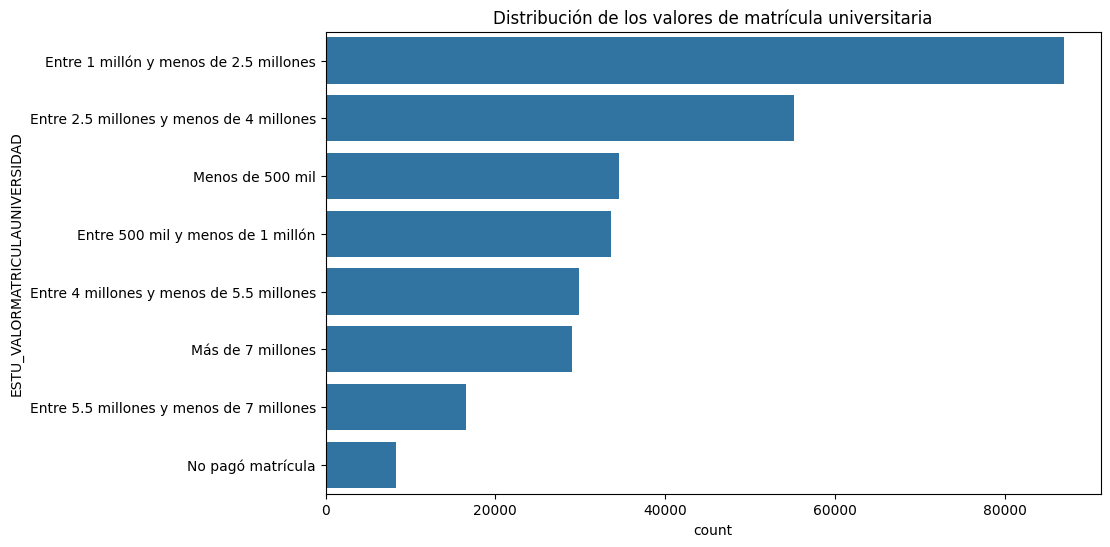

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(y='ESTU_VALORMATRICULAUNIVERSIDAD', data=test, order=test['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index)
plt.title('Distribución de los valores de matrícula universitaria')
plt.show()

Relación entre las horas de trabajo y el pago de matrícula propio

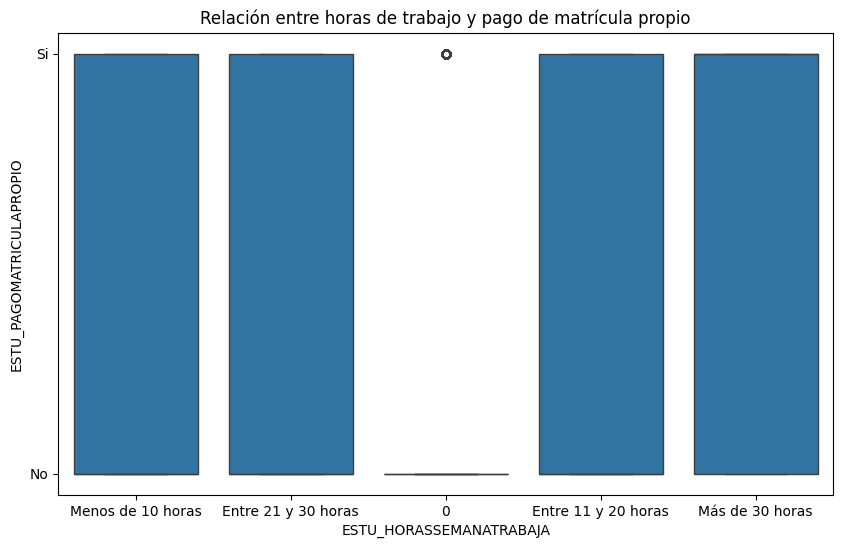

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ESTU_HORASSEMANATRABAJA', y='ESTU_PAGOMATRICULAPROPIO', data=test)
plt.title('Relación entre horas de trabajo y pago de matrícula propio')
plt.show()

Distribución de la Educación del Padre

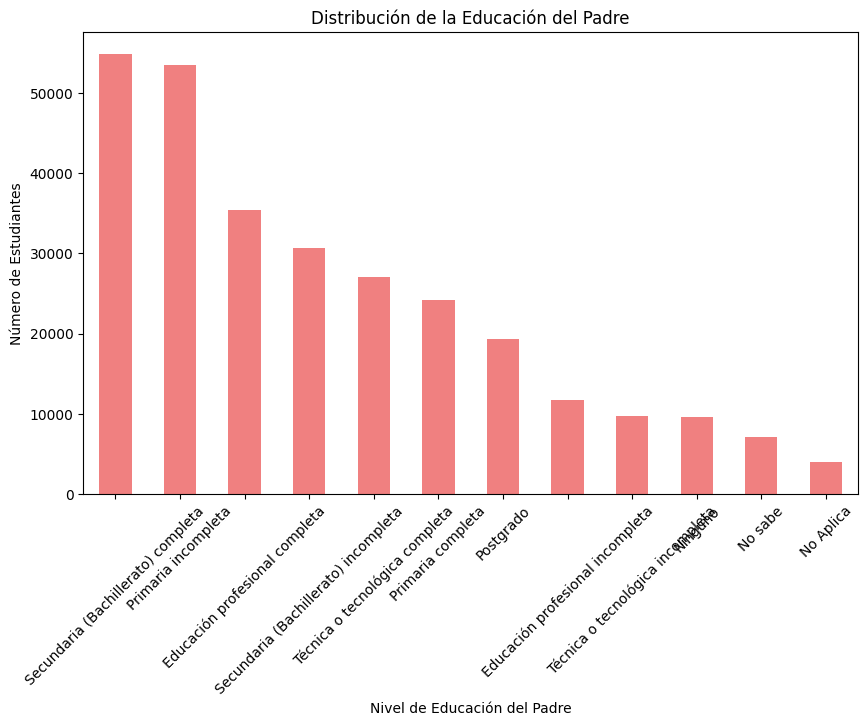

In [ ]:
educacion_padre_counts = test['FAMI_EDUCACIONPADRE'].value_counts()

plt.figure(figsize=(10, 6))
educacion_padre_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribución de la Educación del Padre')
plt.xlabel('Nivel de Educación del Padre')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.show()


# PREPROCESADO

In [ ]:
import numpy as np

In [ ]:
train_copy = train.copy()

**Columna del pregrado que estudia**

In [ ]:
sum(train.ESTU_PRGM_ACADEMICO.isna())

0

In [ ]:
train.ESTU_PRGM_ACADEMICO.value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [ ]:
train.ESTU_PRGM_ACADEMICO.value_counts().index

Index(['DERECHO', 'ADMINISTRACION DE EMPRESAS', 'CONTADURIA PUBLICA',
       'PSICOLOGIA', 'INGENIERIA INDUSTRIAL', 'ADMINISTRACIÓN DE EMPRESAS',
       'INGENIERIA CIVIL', 'MEDICINA', 'PSICOLOGÍA', 'INGENIERIA DE SISTEMAS',
       ...
       'ADMINISTRACION TECNOLOGICA', 'LICENCIATURA EN ARTE Y FOLKLORE',
       'FORMACION PROFESIONAL EN DEPORTE',
       'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS SOCIALES',
       'LICENCIATURA EN FÍSICA', 'LICENCIATURA EN ESPAÑOL Y FILOLOGÍA',
       'ADMINISTRACION EN NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION DE COMERCIO EXTERIOR',
       'LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES',
       'PROFESIONAL EN INVESTIGACIÓN CRIMINAL'],
      dtype='object', name='ESTU_PRGM_ACADEMICO', length=948)

In [ ]:
train.ESTU_PRGM_ACADEMICO.value_counts()[train.ESTU_PRGM_ACADEMICO.value_counts()==1].index


Index(['LICENCIATURA EN EDUCACION FISICA, DEPORTE Y RECREACION ENFASIS RURAL',
       'DISEÑO DE MODAS Y ALTA COSTURA',
       'LICENCIATURA EN EDUCACION ENFASIS EN CIENCIAS SOCIALES',
       'INGENIERÍA DE MINAS',
       'LICENCIATURA EN EDUCACION BASICA PRIMARIA:ENFASIS EN CIENCIAS SOCIALES',
       'ADMINISTRACIÓN DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL',
       'QUIMICA Y FARMACIA',
       'LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES',
       'COMUNICACIÓN SOCIAL Y PERIODISMO',
       'LICENCIATURA EN CIENCIAS DE LA EDUCACION',
       'LICENCIATURA EN ARTES ESC¿NICAS', 'CIENCIAS DE LA COMPUTACION',
       'DEPORTE Y ACTIVIDADA FISICA', 'ADMINISTRACION TECNOLOGICA',
       'LICENCIATURA EN ARTE Y FOLKLORE', 'FORMACION PROFESIONAL EN DEPORTE',
       'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS SOCIALES',
       'LICENCIATURA EN FÍSICA', 'LICENCIATURA EN ESPAÑOL Y FILOLOGÍA',
       'ADMINISTRACION EN NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION

In [ ]:
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col])

    k = to_onehot(d[col].values)
    r = pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index).join(d)
    del(r[col])
    return r

In [ ]:
col = 'ESTU_PRGM_ACADEMICO'
procesado_pregrado_estudia = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna departamento**

In [ ]:
sum(train.ESTU_PRGM_DEPARTAMENTO.isna())

0

In [ ]:
train.ESTU_PRGM_DEPARTAMENTO.value_counts().index

Index(['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'ATLANTICO', 'SANTANDER',
       'NORTE SANTANDER', 'BOLIVAR', 'BOYACA', 'CUNDINAMARCA', 'NARIÑO',
       'RISARALDA', 'CORDOBA', 'TOLIMA', 'CALDAS', 'CAUCA', 'HUILA',
       'MAGDALENA', 'SUCRE', 'CESAR', 'QUINDIO', 'META', 'LA GUAJIRA', 'CHOCO',
       'CAQUETA', 'CASANARE', 'PUTUMAYO', 'ARAUCA', 'AMAZONAS', 'GUAVIARE',
       'VAUPES', 'SAN ANDRES'],
      dtype='object', name='ESTU_PRGM_DEPARTAMENTO')

In [ ]:
col = 'ESTU_PRGM_DEPARTAMENTO'

In [ ]:
procesado_departamentos = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna del estrato**

In [ ]:
sum(train.FAMI_ESTRATOVIVIENDA.isna())

32137

In [ ]:
train.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [ ]:
train_copy['FAMI_ESTRATOVIVIENDA'] = train_copy['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

In [ ]:
estratos_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

In [ ]:
train_copy['FAMI_ESTRATOVIVIENDA'] = np.array([estratos_map.get(i, np.nan) for i in train_copy['FAMI_ESTRATOVIVIENDA']])

In [ ]:
"""
k = train_estrato['FAMI_ESTRATOVIVIENDA'].copy()
k[k.isna()] = np.round(np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna())))
k = k.clip(1, 6)
train_estrato['FAMI_ESTRATOVIVIENDA'] = k

"""

"\nk = train_estrato['FAMI_ESTRATOVIVIENDA'].copy()\nk[k.isna()] = np.round(np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna())))\nk = k.clip(1, 6)\ntrain_estrato['FAMI_ESTRATOVIVIENDA'] = k\n\n"

In [ ]:
valores_posibles_estrato = np.array([1, 2, 3, 4, 5, 6])
frecuencias_estrato = np.array([111991, 232671, 210685, 65514, 23608, 12605])
probabilidades_estrato = frecuencias_estrato / frecuencias_estrato.sum()
k = train_copy['FAMI_ESTRATOVIVIENDA'].copy()
indices_nulos_estrato = np.isnan(k)
k[indices_nulos_estrato] = np.random.choice(valores_posibles_estrato, size=np.sum(indices_nulos_estrato), p=probabilidades_estrato)
train_copy['FAMI_ESTRATOVIVIENDA'] = k

In [ ]:
rmap = {
    1.0: 'Estrato 1',
    2.0: 'Estrato 2',
    3.0: 'Estrato 3',
    4.0: 'Estrato 4',
    5.0: 'Estrato 5',
    6.0: 'Estrato 6'
}

In [ ]:
train_copy['FAMI_ESTRATOVIVIENDA'] = np.array([rmap[i] for i in train_copy['FAMI_ESTRATOVIVIENDA']])

In [ ]:
col = 'FAMI_ESTRATOVIVIENDA'
procesado_estrato = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna horas de trabajo**

In [ ]:
train.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [ ]:
train.ESTU_HORASSEMANATRABAJA.isna().sum()

30857

In [ ]:
horas_trabajo_map = {
    'Más de 30 horas': 35,
    '0': 0,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Menos de 10 horas': 5
}

In [ ]:
train_copy['ESTU_HORASSEMANATRABAJA'] = np.array([horas_trabajo_map.get(i, np.nan) for i in train_copy['ESTU_HORASSEMANATRABAJA']])

In [ ]:
valores_posibles_horas = np.array([35, 0, 15, 25, 5])
frecuencias_horas = np.array([249352, 116550, 115857, 92693, 87191])
probabilidades_horas = frecuencias_horas / frecuencias_horas.sum()
m = train_copy['ESTU_HORASSEMANATRABAJA'].copy()
indices_nulos_horas = np.isnan(m)
m[indices_nulos_horas] = np.random.choice(valores_posibles_horas, size=np.sum(indices_nulos_horas), p=probabilidades_horas)
train_copy['ESTU_HORASSEMANATRABAJA'] = m

In [ ]:
horas_trabajo_remap = {
    35: 'Más de 30 horas',
    0: '0',
    15: 'Entre 11 y 20 horas',
    25: 'Entre 21 y 30 horas',
    5: 'Menos de 10 horas'
}

In [ ]:
train_copy['ESTU_HORASSEMANATRABAJA']= np.array([horas_trabajo_remap[i] for i in train_copy['ESTU_HORASSEMANATRABAJA']])

In [ ]:
col = 'ESTU_HORASSEMANATRABAJA'
procesado_horas = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna Internet**

In [ ]:
train.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357


In [ ]:
train.FAMI_TIENEINTERNET.isna().sum()

26629

In [ ]:
internet_map = {
    'Si': 1,
    'No': 0,
}

In [ ]:
train_copy['FAMI_TIENEINTERNET'] = np.array([internet_map.get(i, np.nan) for i in train_copy['FAMI_TIENEINTERNET'] ])

In [ ]:
valores_posibles_internet = np.array([1,0])
frecuencias_internet = np.array([592514, 73357])
probabilidades_internet = frecuencias_internet / frecuencias_internet.sum()
p = train_copy['FAMI_TIENEINTERNET'].copy()
indices_nulos_internet = np.isnan(p)
p[indices_nulos_internet] = np.random.choice(valores_posibles_internet, size=np.sum(indices_nulos_internet), p=probabilidades_internet)
train_copy['FAMI_TIENEINTERNET'] = p

In [ ]:
internet_remap = {
    1: 'Si',
    0: 'No',
}

In [ ]:
train_copy['FAMI_TIENEINTERNET'] = np.array([internet_remap[i] for i in train_copy['FAMI_TIENEINTERNET']])

In [ ]:
col = 'FAMI_TIENEINTERNET'
procesado_internet = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna pago matricula propio**

In [ ]:
train.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


In [ ]:
train.ESTU_PAGOMATRICULAPROPIO.isna().sum()

6498

In [ ]:
pagomatricula_map = {
    'Si': 1,
    'No': 0,
}

In [ ]:
train_copy['ESTU_PAGOMATRICULAPROPIO'] = np.array([pagomatricula_map.get(i, np.nan) for i in train_copy['ESTU_PAGOMATRICULAPROPIO'] ])

In [ ]:
valores_posibles_pagomatricula  = np.array([1,0])
frecuencias_pagomatricula  = np.array([303801, 382201])
probabilidades_pagomatricula  = frecuencias_pagomatricula  / frecuencias_pagomatricula .sum()
w = train_copy['ESTU_PAGOMATRICULAPROPIO'].copy()
indices_nulos_pagomatricula= np.isnan(w)
w[indices_nulos_pagomatricula] = np.random.choice(valores_posibles_pagomatricula, size=np.sum(indices_nulos_pagomatricula), p=probabilidades_pagomatricula)
train_copy['ESTU_PAGOMATRICULAPROPIO'] = w

In [ ]:
pagomatricula_remap = {
    1: 'Si',
    0: 'No',
}

In [ ]:
train_copy['ESTU_PAGOMATRICULAPROPIO'] = np.array([pagomatricula_remap[i] for i in train_copy['ESTU_PAGOMATRICULAPROPIO']])

In [ ]:
col = 'ESTU_PAGOMATRICULAPROPIO'
procesado_pagomatricula = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna educacion madre**

In [ ]:
train.FAMI_EDUCACIONMADRE.isna().sum()

23664

In [ ]:
train.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


In [ ]:
train_copy.FAMI_EDUCACIONMADRE.values[train_copy.FAMI_EDUCACIONMADRE.isna()] = 'no info'

In [ ]:
train_copy.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in train_copy.FAMI_EDUCACIONMADRE.values]

In [ ]:
col = 'FAMI_EDUCACIONMADRE'
procesado_educacionmadre = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna educacion padre**

In [ ]:
train.FAMI_EDUCACIONPADRE.isna().sum()

23178

In [ ]:
train.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


In [ ]:
train_copy.FAMI_EDUCACIONPADRE.values[train_copy.FAMI_EDUCACIONPADRE.isna()] = 'no info'

In [ ]:
train_copy.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in train_copy.FAMI_EDUCACIONPADRE.values]

In [ ]:
col = 'FAMI_EDUCACIONPADRE'
procesado_educacionpadre = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna periodo**

In [ ]:
train.PERIODO.isna().sum()

0

In [ ]:
train.PERIODO.value_counts()

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [ ]:
col = 'PERIODO'
procesado_periodo = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna valor de la matricula**

In [ ]:
train.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()

6287

In [ ]:
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [ ]:
valormatricula_map = {
  'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
        }

In [ ]:
train_copy['ESTU_VALORMATRICULAUNIVERSIDAD'] = np.array([valormatricula_map.get(i, np.nan) for i in train_copy['ESTU_VALORMATRICULAUNIVERSIDAD']])

In [ ]:
valores_posibles_valormatricula = np.array([1.75, 3.25, .250, .75, 4.75, 7.75, 6.25, 0])
frecuencias_valormatricula = np.array([204048, 127430, 80263, 78704, 69736, 68014, 38490, 19528])
probabilidades_valormatricula = frecuencias_valormatricula / frecuencias_valormatricula.sum()
e = train_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].copy()
indices_nulos_valormatricula = np.isnan(e)
e[indices_nulos_valormatricula] = np.random.choice(valores_posibles_valormatricula, size=np.sum(indices_nulos_valormatricula), p=probabilidades_valormatricula)
train_copy['ESTU_VALORMATRICULAUNIVERSIDAD'] = e

In [ ]:
valormatricula_remap = {
    1.75: 'Entre 1 millón y menos de 2.5 millones',
    3.25: 'Entre 2.5 millones y menos de 4 millones',
    0.250: 'Menos de 500 mil',
    0.75: 'Entre 500 mil y menos de 1 millón',
    4.75: 'Entre 4 millones y menos de 5.5 millones',
    7.75: 'Más de 7 millones',
    6.25: 'Entre 5.5 millones y menos de 7 millones',
    0: 'No pagó matrícula',
}

In [ ]:
train_copy['ESTU_VALORMATRICULAUNIVERSIDAD']= np.array([valormatricula_remap[i] for i in train_copy['ESTU_VALORMATRICULAUNIVERSIDAD']])

In [ ]:
col = 'ESTU_VALORMATRICULAUNIVERSIDAD'
procesado_valormatricula = replace_column_with_onehot(train_copy[[col]].dropna().copy(), col)

**Columna rendimiento global**

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'
redimientoglobal_map = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train_copy[y_col] = [redimientoglobal_map[i] for i in train_copy[y_col]]

**COCATENACION Y FINALIZACION DE PREPROCESADO**

In [ ]:
train_copy = pd.concat([procesado_pregrado_estudia, procesado_departamentos, procesado_estrato, procesado_horas, procesado_internet, procesado_pagomatricula, procesado_educacionmadre, procesado_educacionpadre, procesado_periodo, procesado_valormatricula, train_copy],  axis= 1 )

In [ ]:
train_copy = train_copy.drop( columns=['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO'])

In [ ]:
train_copy

,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,...,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,ID,RENDIMIENTO_GLOBAL
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,904256,2
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,645256,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,308367,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,470353,3
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,989032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,25096,2
692496,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,754213,0
692497,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,504185,1
692498,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,986620,0
